<a href="https://colab.research.google.com/github/emslaboratory/SYSC4415/blob/master/W2026/Assignments/A1/SYSC4415_W26_A1.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Required Setup for local Running if you are not using Google Colab

Install [Anaconda distribution] (https://docs.anaconda.com/anaconda/install/)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn/sklearn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **waterqmark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.

To make sure you have all of the packages you need, install them with `conda`:

```
conda create -n SYSC4415_tutorials python=3.11
conda activate SYSC4415_tutorials

conda install jupyter
conda install numpy pandas scikit-learn matplotlib seaborn graphviz statsmodels
conda install -c conda-forge watermark

```

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

## NOTE about Signature in Google Colab:

Use `!pip install watermark` in Google Colab if you have errors while signing your notebook. If you work locally and follow the instructions above in the correct order, it should be already installed.

## General Instructions:

Please print out values when asked using Python's print() function with f-strings where possible.

Submit your saved notebook with all the outputs to Brightspace, but make sure that it will produce correct outputs upon restarting and click "runtime" → "run all" with clean outputs. Ensure your notebook displays all answers when this is clicked.

## Your Submission MUST contain your signature at the bottom.


In [ ]:
# Name: Brix Velasco
# Student Number: 101219748

In [33]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz

## Section 1: Gradients (4 marks)
Hint: use attached PDF if you get lost.

In [30]:
"""
Q1a (1 mark)
- Manually derive and calculate the gradient of the function: f(x,y,z) = e^(x²) + y^y + e^(xy) + zcos(x) at point (0,1, 1)
- Show each component of the gradient.

Print your answer using print() function showing all three partial derivatives.
"""
print("partial derivative f/x at (0,1,1) =", 1)
print("partial derivative f/y at (0,1,1) =", 1)
print("partial derivative f/z at (0,1,1) =", 1)





partial derivative f/x at (0,1,1) = 1
partial derivative f/y at (0,1,1) = 1
partial derivative f/z at (0,1,1) = 1


In [31]:
"""
Q1b (1 mark)
For each component of the gradient calculated in Q1a:
- Explain what the value means geometrically
- Provide a conclusion about each term and gradient in general
"""

# YOUR ANSWER HERE
"""
-the x component being positive means moving in the +x locally increases f and the magnitude
1 tells you the local sensitivity to x
-the y component being positive means moving in +y locally increases f and 1 indicates the local sensitivity
to y at  that point
-the z component being positive means moving in +z locally increases f and 1 is the local sensitivity to z

- the gradient vector collects all partial derivaties and points in the direction where f increases the fastest
and has the steepest ascent

"""

'\n-the x component being positive means moving in the +x locally increases f and the magnitude\n1 tells you the local sensitivity to x\n-the y component being positive means moving in +y locally increases f and 1 indicates the local sensitivity\nto y at  that point\n-the z component being positive means moving in +z locally increases f and 1 is the local sensitivity to z\n\n- the gradient vector collects all partial derivaties and points in the direction where f increases the fastest\nand has the steepest ascent\n\n'

In [32]:
"""
Q1c (2 marks)
Write a Python function to verify your gradient calculation numerically:
1. Implement the function f(x,y,z)
2. Calculate numerical approximations of partial derivatives using small perturbations
3. Compare your analytical results from Q1a with numerical approximations
4. Report the result of function evaluation at the point (0,1,1)
"""

# YOUR ANSWER HERE
# 1)

def f(x, y, z):
    return np.exp(x**2) + y**y + np.exp(x*y) + z * np.cos(x)



# 2)
def numerical_gradient(x, y, z, h=1e-6):
    dfdx = (f(x + h, y, z) - f(x - h, y, z)) / (2*h)
    dfdy = (f(x, y + h, z) - f(x, y - h, z)) / (2*h)
    dfdz = (f(x, y, z + h) - f(x, y, z - h)) / (2*h)
    return dfdx, dfdy, dfdz


# 3) Compare analytical vs numerical (absolute error)

# Point of evaluation
x, y, z = 0, 1, 1

analytical_grad = np.array([1.0, 1.0, 1.0])
numerical_grad = np.array(numerical_gradient(x, y, z))

print("Analytical Gradient:", analytical_grad)
print("Numerical Gradient :", numerical_grad)
print("Difference         :", numerical_grad - analytical_grad)


# 4) Report f(0,1,1)
value = f(0, 1, 1)
print("f(0,1,1) =", value)



Analytical Gradient: [1. 1. 1.]
Numerical Gradient : [1. 1. 1.]
Difference         : [1.39777967e-10 1.39777967e-10 1.39777967e-10]
f(0,1,1) = 4.0


## Section 2: Data Analysis (8 marks)

This section uses the Palmer Penguins dataset, which contains measurements from three penguin species.
The dataset includes physical measurements like bill length, bill depth, flipper length, and body mass. We are building a penguin classifier. First we need to assess out data.

In [80]:
"""
Q2a (1 mark)
✅ Load the Palmer Penguins dataset using Seaborn's load_dataset (provided)
- Show that it contains valid data
- Create variables for numerical features and labels
- Perform basic statistical analysis by printing the general statistics table as in Tutorials.
- Find missing values and drop records with missing values for any feature
- Save entries with missing values for "sex" in a separate variable, we'll use it later.
"""

# Load data
penguins = sb.load_dataset("penguins")

# YOUR ANSWER HERE
print("Shape:", penguins.shape)
print("\nColumns:", penguins.columns.tolist())
print("\nHead:\n", penguins.head())
print("\nInfo:")
penguins.info()

num_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
label_col = "species"

X = penguins[num_features]
y = penguins[label_col]

print("\nGeneral statistics:\n", X.describe())
print("\nMissing values per column:\n", penguins.isna().sum())

sex_missing = penguins[penguins["sex"].isna()].copy()

penguins_clean = penguins.dropna().copy()
X_clean = penguins_clean[num_features]
y_clean = penguins_clean[label_col]

print("\nRows with missing sex:", len(sex_missing))
print("Cleaned shape:", penguins_clean.shape)

Shape: (344, 7)

Columns: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

Head:
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island     

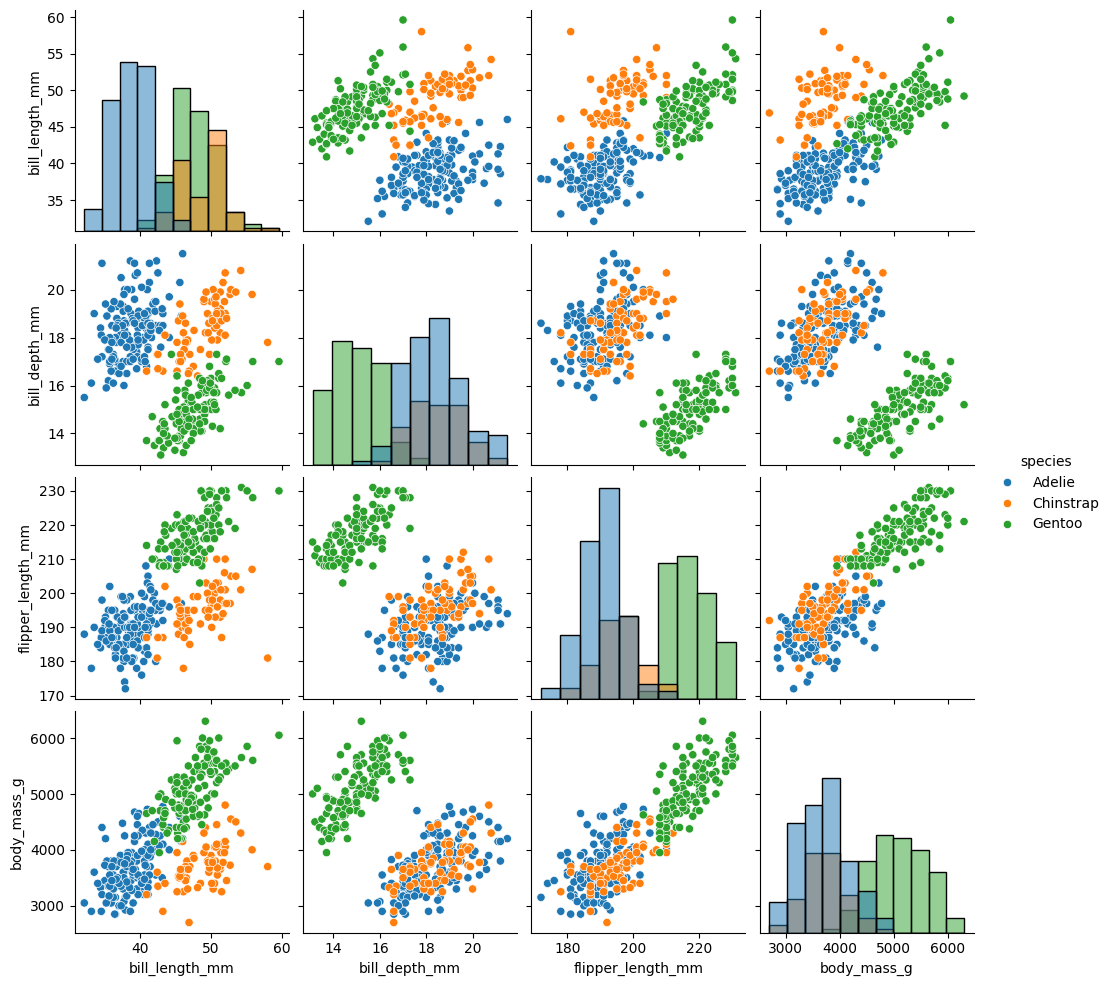

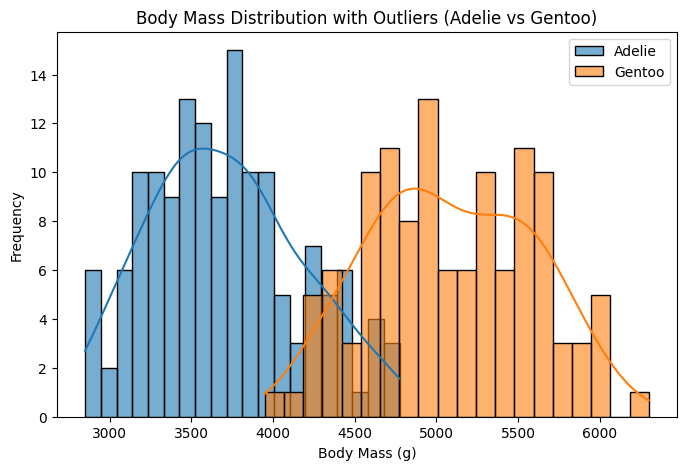

In [40]:
"""
Q2b (2 marks)
Create visualizations showing:
- Create scatterplot matrix for visual assessment of data
- Identify one feature with outliers and show distribution values for two classes (2 histograms).
"""

# YOUR ANSWER HERE
# Scatterplot matrix (pairplot) for numerical features
sb.pairplot(
    penguins_clean,
    vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"],
    hue="species",
    diag_kind="hist"
)
plt.show()

# Feature with visible outliers: body_mass_g
# Plot distribution for two classes (Adelie vs Gentoo)

plt.figure(figsize=(8, 5))

sb.histplot(
    data=penguins_clean[penguins_clean["species"] == "Adelie"],
    x="body_mass_g",
    bins=20,
    kde=True,
    label="Adelie",
    alpha=0.6
)

sb.histplot(
    data=penguins_clean[penguins_clean["species"] == "Gentoo"],
    x="body_mass_g",
    bins=20,
    kde=True,
    label="Gentoo",
    alpha=0.6
)

plt.title("Body Mass Distribution with Outliers (Adelie vs Gentoo)")
plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Class counts:
 species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

Class proportions:
 species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64


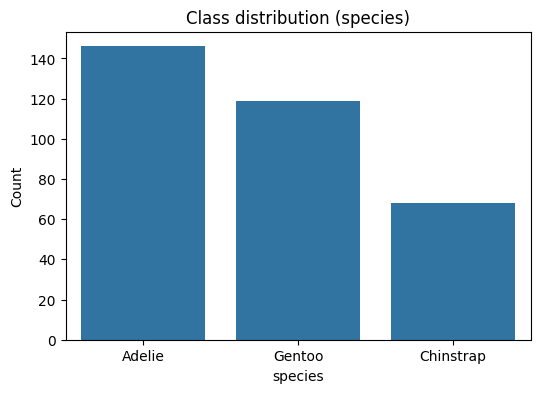

there is a class imbalance where adelie is the largest class, gentoo is next and chinstrap is much smaller


In [52]:
"""
Q2c (1 mark)
Analyze class distribution and discuss implications for model training:
- Calculate and visualize class proportions
- Identify any class imbalance
"""

# YOUR ANSWER HERE
# Class counts + proportions
class_counts = penguins_clean[label_col].value_counts()
class_props = penguins_clean[label_col].value_counts(normalize=True)

print("Class counts:\n", class_counts)
print("\nClass proportions:\n", class_props)

# Visualize proportions
plt.figure(figsize=(6,4))
ax = sb.countplot(data=penguins_clean, x=label_col, order=class_counts.index)
plt.title("Class distribution (species)")
plt.ylabel("Count")
plt.xlabel(label_col)
plt.show()


print("there is a class imbalance where adelie is the largest class, gentoo is next and chinstrap is much smaller")



## Section 3: Model Development (8 marks)
After polishing thedata, let's make our classification model.

In [79]:
"""
Q3a (2 marks)
Preprocess the data:
- Use the clean dataset from Q2a (with missing values removed)
- Split into training (80%) and test (20%) sets using random_state=42
- Print first 5 rows of training data with their species labels
- Print shapes of both datasets
- Show number of samples per species in each split
"""

# YOUR ANSWER HERE
num_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
label_col = "species"

X = penguins_clean[num_features]
y = penguins_clean[label_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(pd.concat([X_train.head(), y_train.head()], axis=1))
print("\nShapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)

print("\nSamples per species (train):")
print(y_train.value_counts())
print("\nSamples per species (test):")
print(y_test.value_counts())


     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g    species
268            44.9           13.3              213.0       5100.0     Gentoo
205            50.7           19.7              203.0       4050.0  Chinstrap
337            48.8           16.2              222.0       6000.0     Gentoo
123            41.4           18.5              202.0       3875.0     Adelie
38             37.6           19.3              181.0       3300.0     Adelie

Shapes:
X_train: (266, 4) y_train: (266,)
X_test : (67, 4) y_test : (67,)

Samples per species (train):
species
Adelie       117
Gentoo        95
Chinstrap     54
Name: count, dtype: int64

Samples per species (test):
species
Adelie       29
Gentoo       24
Chinstrap    14
Name: count, dtype: int64


Training accuracy: 1.0
Test accuracy:     0.8507462686567164
CV std:  0.05478407279811134


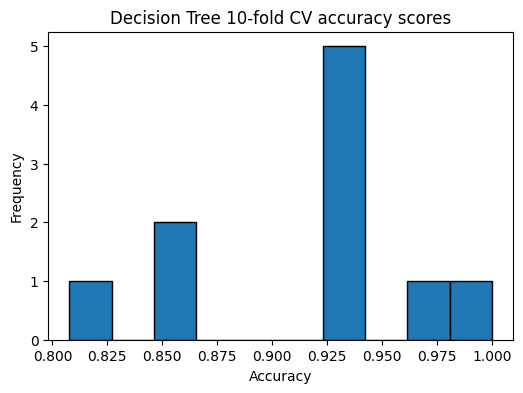

this histo gram shows how the accuracy varies across the 10 folds.
a tight cluster means stable performance, and a wide spread means the model is sensitive to which samples land in each fold.


In [76]:
"""
Q3b (3 marks)
Train and evaluate a Decision Tree:
1. Create a Decision Tree with default parameters (random_state=42)
2. Evaluate the model:
   - Fit on training data (numerical features only)
   - Print training and test accuracy score for this tree
   - Perform 10-fold cross-validation
   - Print mean and std of cross-validation scores and build cv_scores histogram.
   - What does the histogram show?
"""

from sklearn.model_selection import cross_val_score

# YOUR ANSWER HERE
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

train_acc = dt.score(X_train, y_train)
test_acc  = dt.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Test accuracy:    ", test_acc)

cv_scores = cross_val_score(dt, X_train, y_train, cv=10)
print("CV std: ", cv_scores.std())

plt.figure(figsize=(6,4))
plt.hist(cv_scores, bins=10, edgecolor="black")
plt.title("Decision Tree 10-fold CV accuracy scores")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.show()

print("this histo gram shows how the accuracy varies across the 10 folds.")
print("a tight cluster means stable performance, and a wide spread means the model is sensitive to which samples land in each fold.")

Best params: {'max_depth': 4, 'min_samples_leaf': 4}
Best CV score: 0.9095441595441596


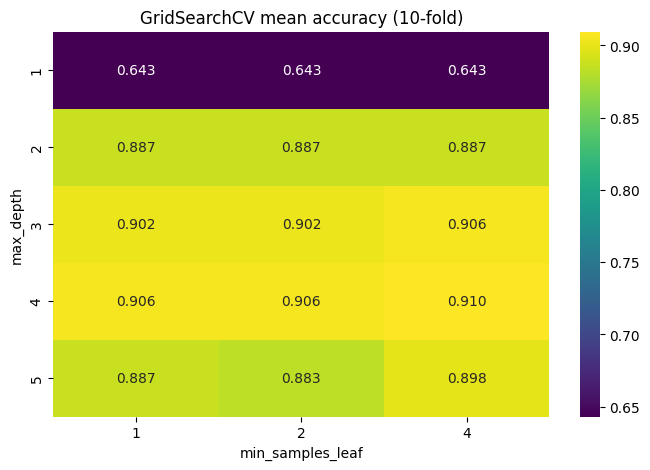

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [77]:
"""
Q3c (3 marks)
Analyze the best model from grid search:
- Initialize parameter_grid, cross_validation using StratifiedKFold
- Identify the best parameters for the tree and show the grid heatmap (don't forget labels)
- Plot the best tree structure using graphviz, use max_depth=2 (for better display)

Note: when using export_graphviz set out_file=None and use display(graph) function call, where
graph is your variable instantiated with Source(dot_data)
Export_graphviz Documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.export_graphviz.html
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import graphviz
from sklearn.tree import export_graphviz
from graphviz import Source

# YOUR ANSWER HERE

param_grid = {
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 4]
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=skf,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

results = pd.DataFrame(grid.cv_results_)

pivot = results.pivot_table(
    values="mean_test_score",
    index="param_max_depth",
    columns="param_min_samples_leaf"
)

plt.figure(figsize=(8, 5))
sb.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis")
plt.title("GridSearchCV mean accuracy (10-fold)")
plt.xlabel("min_samples_leaf")
plt.ylabel("max_depth")
plt.show()

best_tree = grid.best_estimator_

dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=X_train.columns.tolist(),
    class_names=sorted(y_train.unique().astype(str)),
    filled=True,
    rounded=True,
    max_depth=2
)

graph = Source(dot_data)
display(graph)



## Section 4: Missing_Sex Prediction (4 marks)
In this part of the assignment, we are building a model to infer the missing values from the original dataset to fix the broken records.


In [74]:
"""
Q4a (2 marks)
Prepare data for sex prediction:
- Use the clean dataset (no missing values) from Section 2
- Convert species to numeric values.

Note: Unlike the example in the tutorial, we will use a more straightforward method, LabelEncoder().

For this task, you just need to instantiate it, use the fit_transform method on the "species" column,
and reassign or add the column.
See documentation for details:
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

- Create new feature/label split using "sex" as target
- Scale features using StandardScaler().fit_transform(features) as in Tutorial
See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Split data into training (80%) and test (20%) sets
- Train these classifiers:
  * Logistic Regression (solver='lbfgs')
  * Decision Tree (max_depth=3)
  * KNN (n_neighbors=5)
  * SVM (kernel="linear", C=0.025)
- Compare models using (Providing values for each would be enough):
  * Training and test accuracy
  * 10-fold cross-validation scores


"""

# Prepare features including species as numeric
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# YOUR ANSWER HERE
df = penguins_clean.copy()

le = LabelEncoder()
df["species_encoded"] = le.fit_transform(df["species"])

numerical_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X = df[numerical_features + ["species_encoded"]]
y = df["sex"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "LogReg": LogisticRegression(solver="lbfgs", max_iter=1000),
    "DecisionTree_d3": DecisionTreeClassifier(max_depth=3, random_state=42),
    "KNN_5": KNeighborsClassifier(n_neighbors=5),
    "SVM_linear": SVC(kernel="linear", C=0.025)
}

for name, model in models.items():
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    cv_scores = cross_val_score(model, X_scaled, y, cv=10)
    print("\n", name)
    print("Train accuracy:", train_acc)
    print("Test accuracy: ", test_acc)
    print("CV mean/std:   ", cv_scores.mean(), cv_scores.std())



 LogReg
Train accuracy: 0.9135338345864662
Test accuracy:  0.9104477611940298
CV mean/std:    0.9009803921568629 0.05653385572083175

 DecisionTree_d3
Train accuracy: 0.9398496240601504
Test accuracy:  0.835820895522388
CV mean/std:    0.870855614973262 0.06635883872511822

 KNN_5
Train accuracy: 0.9511278195488722
Test accuracy:  0.9253731343283582
CV mean/std:    0.9011586452762923 0.04556529446154024

 SVM_linear
Train accuracy: 0.9022556390977443
Test accuracy:  0.9104477611940298
CV mean/std:    0.8947415329768272 0.061650136942610484


In [73]:
"""
Q4b (2 marks)
Use best model to predict missing sex:
- Make sure to create new variable for subset to work with and copy your variable with missing records into it,
using new_var = your_variable.copy().
- Print records with missing sex values from section 2.
- Remove records that have missing values other than sex using dropna: df.dropna(subset=['column_name'],inplace=True).
- Scale features using StandardScaler().fit_transform(features) as in Q3
- Create new features/labels variables for the new dataset.

- Select best classifier based on test performance from Q4a

- For each record in missing_sex dataset, using best_model.predict(features) and best_model.predict_proba(features)
- Add missing values to the clean dataset and make sure there are no missing values.
"""

# YOUR ANSWER HERE
# Copy + print missing-sex records saved earlier
missing_sex_df = sex_missing.copy()
print("Records with missing sex:\n", missing_sex_df)

# Remove rows that have missing values other than sex
# keep rows where sex is missing, but drop if any OTHER column is missing
cols_except_sex = [c for c in missing_sex_df.columns if c != "sex"]
missing_sex_df.dropna(subset=cols_except_sex, inplace=True)

# Prepare training data for sex prediction
df = penguins_clean.copy()  # no missing values

le = LabelEncoder()
df["species_encoded"] = le.fit_transform(df["species"])
missing_sex_df["species_encoded"] = le.transform(missing_sex_df["species"])

numerical_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
feature_cols = numerical_features + ["species_encoded"]

X = df[feature_cols]
y = df["sex"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train models and pick best by test accuracy
models = {
    "LogReg": LogisticRegression(solver="lbfgs", max_iter=1000),
    "DecisionTree_d3": DecisionTreeClassifier(max_depth=3, random_state=42),
    "KNN_5": KNeighborsClassifier(n_neighbors=5),
    "SVM_linear": SVC(kernel="linear", C=0.025, probability=True)
}

best_name, best_model, best_test = None, None, -1

for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    cv_scores = cross_val_score(model, X_scaled, y, cv=10)
    print(f"\n{name}")
    print("Train acc:", train_acc)
    print("Test acc: ", test_acc)
    print("CV mean/std:", cv_scores.mean(), cv_scores.std())

    if test_acc > best_test:
        best_test = test_acc
        best_name = name
        best_model = model

print("\nBest model (by test accuracy):", best_name, "with test acc =", best_test)

# Predict sex for missing_sex_df
X_missing = missing_sex_df[feature_cols]
X_missing_scaled = scaler.transform(X_missing)

pred_sex = best_model.predict(X_missing_scaled)
pred_proba = best_model.predict_proba(X_missing_scaled)

missing_sex_df["sex_pred"] = pred_sex
print("\nPredictions for missing sex rows:\n", missing_sex_df[feature_cols + ["sex_pred"]])

# adding predictions back into the clean dataset
filled_penguins = penguins.copy()
filled_penguins.loc[missing_sex_df.index, "sex"] = missing_sex_df["sex_pred"]

filled_penguins = filled_penguins.dropna().copy()
print("\nMissing values after filling + dropna():\n", filled_penguins.isna().sum())


Records with missing sex:
     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         34

#### Congratulations! What you just did is called **model-based multiple imputation**. It is one of the methods used to treat missing data.

## Signature:
Don't forget to insert your name and student number and execute.

In [83]:
# Provide your Signarure:
%load_ext watermark
%watermark -a 'Brix Velasco, 101219748' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn,graphviz

ModuleNotFoundError: No module named 'watermark'